# Pymaceuticals Inc.
---

### Analysis

- Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

In [351]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import itertools

In [352]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
#study_results_df.head()

In [353]:
#Look at columns to find where to merge
print(mouse_metadata.columns)
print(study_results.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [354]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results_df, mouse_metadata_df, on=['Mouse ID'])
#copy_mouse_study = mouse_study_df
mouse_study_df['Drug Regimen'].sort_values()
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [355]:
mouse_study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [356]:
#Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points.
number_of_mice = len(mouse_study_df['Mouse ID'].unique())
print(number_of_mice)


249


In [357]:
#Optional: Get all teh data for the duplicate mouse ID
mouse_study_df2 = mouse_study_df[mouse_study_df.duplicated('Mouse ID')]
#print(mouse_study_df2)

mouse_duplicates_list = np.unique(mouse_study_df2['Mouse ID'])
print(mouse_duplicates_list)
print(f'Length of duplicates {len(mouse_duplicates_list)}')

['a203' 'a251' 'a262' 'a275' 'a366' 'a401' 'a411' 'a444' 'a457' 'a492'
 'a520' 'a577' 'a644' 'a685' 'a699' 'a788' 'a818' 'a897' 'a963' 'b128'
 'b313' 'b487' 'b559' 'b742' 'b759' 'b879' 'c139' 'c264' 'c282' 'c302'
 'c326' 'c402' 'c458' 'c559' 'c580' 'c757' 'c758' 'c766' 'c819' 'c832'
 'c895' 'c927' 'd164' 'd251' 'd474' 'e213' 'e227' 'e291' 'e476' 'e584'
 'e662' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f966' 'f993'
 'g107' 'g288' 'g296' 'g316' 'g497' 'g558' 'g570' 'g791' 'g867' 'g989'
 'h246' 'h333' 'h531' 'i177' 'i334' 'i386' 'i477' 'i557' 'i635' 'i669'
 'i738' 'i901' 'j119' 'j235' 'j246' 'j296' 'j365' 'j755' 'j913' 'j984'
 'j989' 'k210' 'k382' 'k403' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l509' 'l558' 'l661' 'l700' 'l725'
 'l733' 'l897' 'm133' 'm269' 'm331' 'm546' 'm550' 'm601' 'm650' 'm756'
 'm957' 'n304' 'n364' 'n630' 'n671' 'n678' 'n763' 'n923' 'n967' 'o287'
 'o302' 'o331' 'o523' 'o562' 'o725' 'o795' 'o809' 'o813' 'o926' 'o973'
 'p136

In [358]:
#Duplicated Mouse ID dataframe
mouse_study_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22


In [359]:
###FLAG WHat am I missing about the 248??

#print(mouse_study_df2["Timepoint"].describe())

In [360]:
#check to evaluate the numbers are the same.
print(mouse_study_df['Mouse ID'].duplicated().sum())
print(mouse_study_df2['Mouse ID'].duplicated().sum())

1644
1407


In [361]:
number_of_mice = len(mouse_study_df['Mouse ID'].unique())
print(number_of_mice)

#mouse_study_df2[["Sex"]].describe()
#mouse_study_df2[["Mouse ID"]].describe()
#mouse_study_df2[["Drug Regimen"]].describe()

249


In [362]:
#drop the duplicates
mouse_study_clean_df = pd.DataFrame()
mouse_study_clean_df = mouse_study_df.drop_duplicates("Mouse ID", keep="first",inplace=False)
mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


# FLAG--- should be 248

In [363]:
mouse_study_clean_df.count()


Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
dtype: int64

### Summary Statistics


In [364]:
#mouse_study_df[["Tumor Volume (mm3)"]].describe()

In [365]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_stats_df = pd.DataFrame()
mouse_study_stats_df.sort_index(axis=1,ascending=True)

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#drug_regimen = mouse_study_df2.groupby(['Drug Regimen'])
mean_tumor_regimen = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume__stddev = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_stderr = mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

#print(drug_regimen)
#mouse_study_stats_df['Drug Regimen'] = [drug_regimen]
mouse_study_stats_df['Mean Tumor Volume(mm3)'] = mean_tumor_regimen
mouse_study_stats_df['Median Tumor Volume(mm3)'] = median_tumor_volume
mouse_study_stats_df['Tumor Volume(mm3) Std. Dev.'] = tumor_volume__stddev
mouse_study_stats_df['Tumor Volume(mm3) Std. Err'] = tumor_volume_stderr

#Assemble the resulting series into a single summary DataFrame.

mouse_study_stats_df.head(20)
#mean_tumor_regimen

,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),Tumor Volume(mm3) Std. Dev.,Tumor Volume(mm3) Std. Err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [366]:
mouse_study_grouped_single = mouse_study_df2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std','sem']})
mouse_study_grouped_single.head()


Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.148392  40.716428  5.043219  0.352234
Ceftamin              53.831559  52.847559  5.892856  0.476409
Infubinol             54.173160  53.244458  6.190806  0.500497
Ketapril              56.805521  56.098998  7.777219  0.609159
Naftisol              55.780565  54.234502  7.797077  0.614496

### Bar and Pie Charts


Text(0, 0.5, 'Number of Mice Tested')

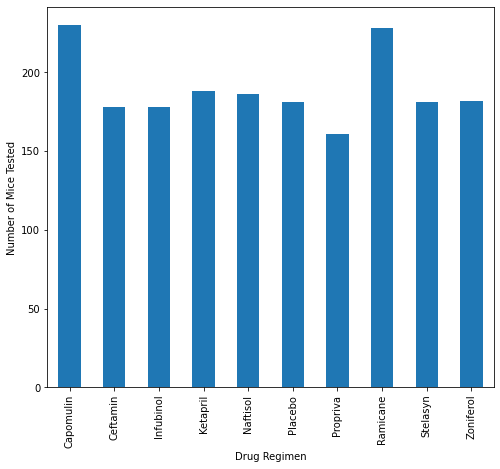

In [367]:
#Create the first bar chart with the Pandas DataFrame.plot() method
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_study_df.groupby(['Drug Regimen'])['Timepoint'].count()

timepoint_chart = timepoints.plot(kind='bar',figsize=(8,7))
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel('Number of Mice Tested')


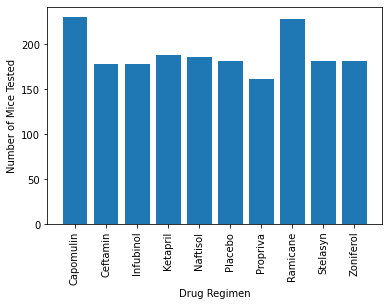

In [368]:
#Create the second bar chart with Matplotlib's pyplot methods.
#plt.bar(timepoints)
#print(type(timepoints))
x = timepoints.index.get_level_values(0)
y = np.array(timepoints)
#print(y)

plt.bar(x,y,align='center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


# Pie Chart- Flag- off numbers

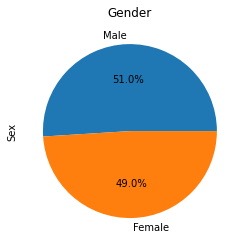

In [369]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Creating plot Using Pandas

#labels = ["Male", "Female"]
gender_data = (mouse_study_df["Sex"].value_counts()/len(mouse_study_df)*100)
gender_data = gender_data.round(0)

# creating dataframe
gender = gender_data.plot(kind='pie',autopct='%.1f%%',labels=["Male", "Female"],title='Gender')
plt.show()

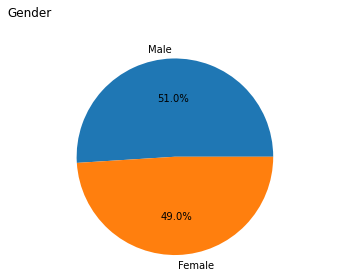

In [370]:
#Pie Chart using Matplotlib

# Creating dataset
gender = ['Male', 'Female']
#x= gender_data.index.get_level_values(0)
 
y = np.array(gender_data)

# Creating plot
plt.pie(y, labels=gender, autopct='%1.1f%%')
plt.title('Gender',pad=32,loc='left')
plt.axis('equal')
plt.show()

### Quartiles, Outliers, and Boxplots

#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [377]:
#Calculate the final tumor volume of each mouse across four of the Drug Regimens

# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#drug_tumorvol_df= pd.DataFrame()
df = mouse_study_df[mouse_study_df["Drug Regimen"].isin(drugs)]
df = df.drop(columns = ['Mouse ID','Metastatic Sites','Sex','Age_months'])
df = df.set_index('Drug Regimen')

# Get the last(greatest)timepoint for each mouse
max_timepoint = df['Timepoint']
#print(max_timepoint.max())


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df2 = pd.DataFrame()
df2['Final Tumor Volume']=df[df['Timepoint']==max_timepoint.max()]['Tumor Volume (mm3)']
# Sort by drug column 
df2 = df2.sort_values(['Drug Regimen'],ascending = [True])
df2.head(40)



,Final Tumor Volume
Drug Regimen,
Capomulin,38.982878
Capomulin,23.343598
Capomulin,38.939633
Capomulin,28.484033
Capomulin,41.483008
Capomulin,40.728578
Capomulin,31.023923
Capomulin,38.125164
Capomulin,40.658124


In [372]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.

treatment_names = drugs
tumor_volume_data = list(df2["Final Tumor Volume"])

print(tumor_volume_data)
#print(drugs)

[38.98287774, 23.34359787, 38.93963263, 28.48403281, 41.48300765, 40.72857787, 31.02392294, 38.1251644, 40.65812366, 36.04104736, 37.31184577, 41.58152074, 31.8962384, 40.1592203, 37.07402422, 38.84687569, 34.45529799, 47.68596303, 32.37735684, 33.32909778, 28.43096411, 59.85195552, 68.92318457, 61.43389223, 59.74190064, 67.52748237, 61.84902336, 68.59474498, 62.99935619, 64.72983655, 64.29983003, 61.38666032, 67.74866174, 64.63494887, 65.52574285, 62.75445141, 66.19691151, 67.68556862, 72.2267309, 60.91876652, 66.08306589, 67.97341878, 62.43540402, 40.65900627, 30.63869575, 45.22086888, 30.56462509, 31.56046955, 38.4076183, 43.0475426, 37.31123552, 36.13485243, 33.39765251, 37.22565033, 32.97852192, 33.56240217, 29.12847181, 38.81036633, 40.66771292, 36.37451039, 31.09533505, 22.05012627, 30.27623175]


In [373]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#calculate interquartile range from a list
q3_l, q1_l = np.percentile(tumor_volume_data, [75 ,25])
iqr_l = q3_l - q1_l
print(iqr_l)

28.66218635


In [374]:
#calculate interquartile range of values in the 'points' column
q75_a, q25_a = np.percentile(df2['Final Tumor Volume'], [75 ,25])
iqr_a = q75_a - q25_a

#display interquartile range 
iqr_a

28.66218635

In [ ]:
#Determine outliers by using the upper and lower bounds, and then print the results.
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32


Use Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

### Line and Scatter Plots

In [345]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = df.loc[['Capomulin']]
capomulin = 
#lineplt = capomulin.plot.line(x='Timepoint',y='Tumor Volume (mm3)')


,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,0,45.000000
Capomulin,5,45.651331
Capomulin,10,43.270852
Capomulin,15,43.784893
Capomulin,20,42.731552


In [385]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#FLAG _ Need to group byy Capomulin not all drugs


volume_weight_df = pd.DataFrame()
mean_tumor_Cregimen = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Cweight = mouse_study_df.groupby(['Drug Regimen'])['Weight (g)'].mean()

volume_weight_df["Mean Tumor Volume"] = mean_tumor_regimen
volume_weight_df['Weight (g)'] = weight
volume_weight_df.head(10)



,Mean Tumor Volume,Weight (g)
Drug Regimen,,
Capomulin,40.675741,19.965217
Ceftamin,52.591172,27.398876
Infubinol,52.884795,27.196629
Ketapril,55.235638,27.861702
Naftisol,54.331565,27.166667
Placebo,54.033581,27.928177
Propriva,52.322552,27.043478
Ramicane,40.216745,19.679825
Stelasyn,54.233149,27.856354


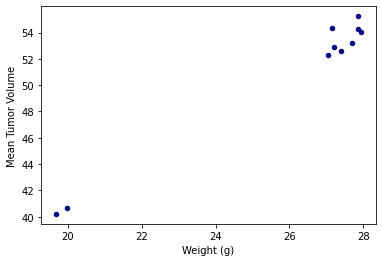

In [382]:
weight_ax1 = volume_weight_df.plot.scatter(x='Weight (g)',y='Mean Tumor Volume',c='DarkBlue')
